In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from skimage.feature import graycomatrix, graycoprops
from image_extractor import init_lut,apply_lut, hsv_filter, statistic_analysis, geometry_analysis, linear_fn, curved, seperate_chanel, hsv_contour_extract, select_feature, bounding_box, aspect_crop, preprocess_hsv

# image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Agglutinated/image (35).JPG'
# image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Brittle/image (35).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Purple/image (23).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Purple/image (56).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Moldered/image (67).JPG'
image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Slaty/image (56).JPG'


plt.rcParams['figure.dpi'] = 102

image  = cv2.imread(image_dir)
# image2 = cv2.imread(image2_dir)
# im_shape = np.shape(image)
lut1 = init_lut(fn=linear_fn, coefficient=10)
lut2 = init_lut(fn=curved, coefficient=1.5)

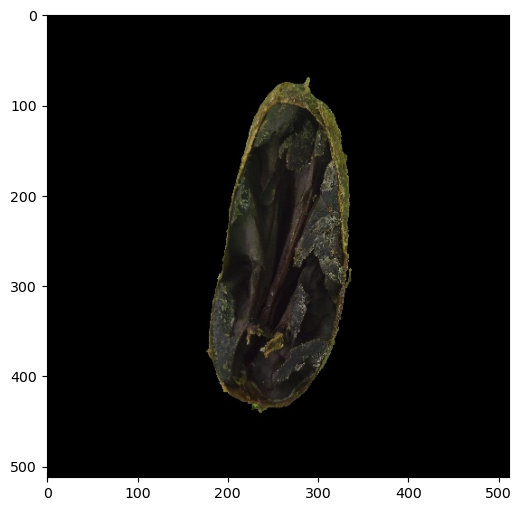

In [2]:
plt.rcParams["figure.figsize"] = (6,6)
origin_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(origin_rgb)
plt.show()

ori =  7.155788421630859


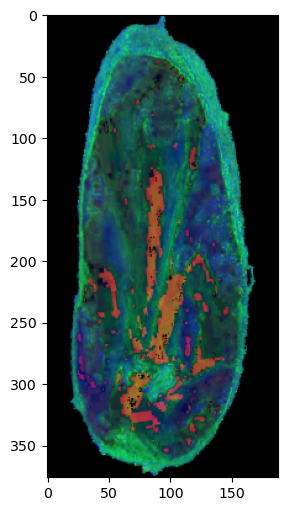

In [3]:
image_hsv, cnt = preprocess_hsv(image)
origin_rgb = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)

plt.imshow(image_hsv)
plt.show()

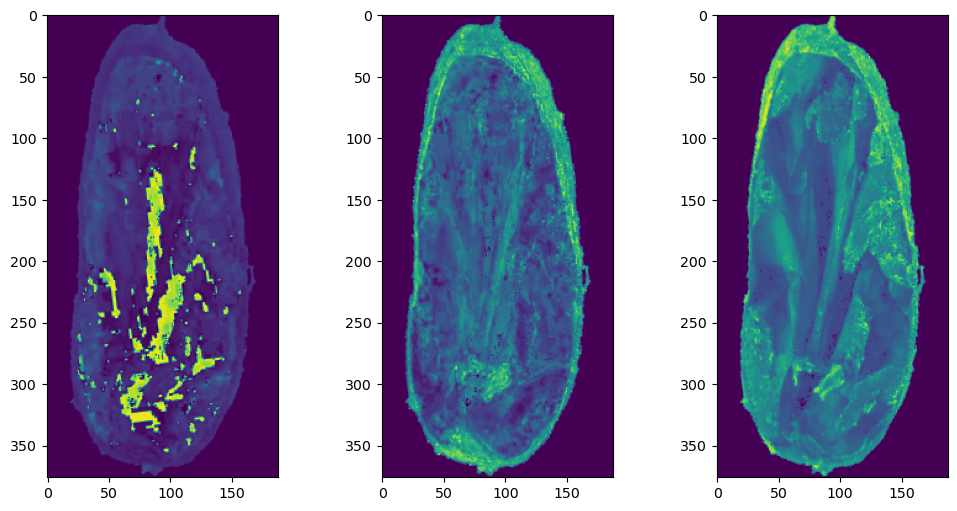

In [4]:
plt.rcParams["figure.figsize"] = (12,6)
h,s,v = seperate_chanel(image_hsv, plot=True)

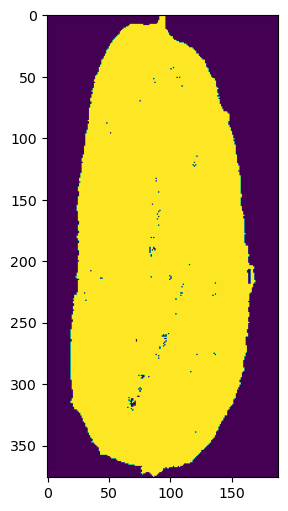

In [5]:
ret, thv = cv2.threshold(v, 20, 255, cv2.THRESH_BINARY)
plt.imshow(thv)
plt.show()

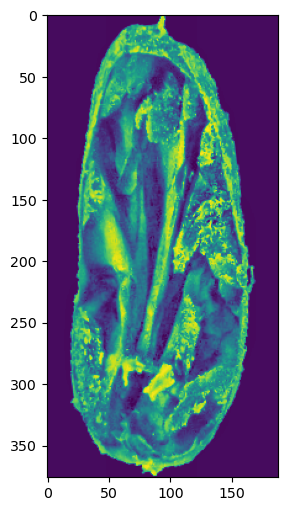

In [6]:
plt.rcParams["figure.figsize"] = (6,6)
# v = CLAHE(v, grey=True)
clahe = cv2.createCLAHE(clipLimit=6.0, tileGridSize=(8,8))
v = clahe.apply(v)

plt.imshow(v)
plt.show()

In [7]:
plt.rcParams["figure.figsize"] = (6,6)
level = 32
bins = np.linspace(0, 255+1, level+1)
digitize = np.digitize(v, bins) - 1

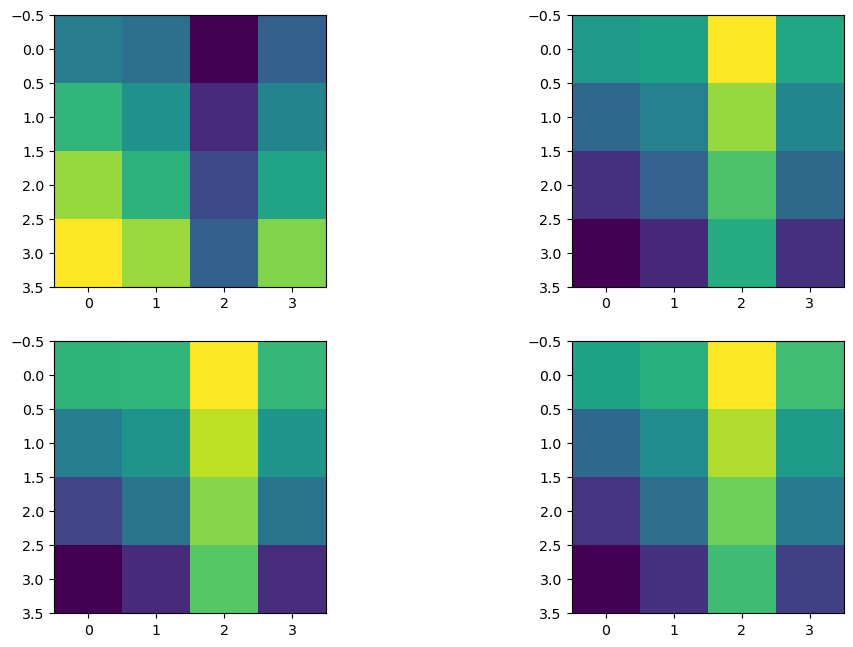

In [8]:
plt.rcParams["figure.figsize"] = (12,12)

glcm = graycomatrix(digitize, [5,7,9,11], [0, np.pi/4, np.pi/2, 3*np.pi/4], level, True, False)
glcm_cons = graycoprops(glcm, 'contrast')
glcm_dissimilarity = graycoprops(glcm, 'dissimilarity')
glcm_energy = graycoprops(glcm, 'ASM')
glcm_correlation = graycoprops(glcm, 'correlation')
glcm_homogeneity = graycoprops(glcm, 'homogeneity')
# print(glcm[:,:,0,0])
# for i in range(4):
#     for j in range(4):
#         mat = glcm[1:level-2,1:level-2,i,j]
#         plt.subplot(4,4,i*4+j+1)
#         plt.imshow(mat)

plt.subplot(3,2,1)
plt.imshow(glcm_cons)
plt.subplot(3,2,2)
plt.imshow(glcm_homogeneity)
plt.subplot(3,2,3)
plt.imshow(glcm_energy)
plt.subplot(3,2,4)
plt.imshow(glcm_correlation)
plt.show()

In [11]:
# plt.rcParams["figure.figsize"] = (6,6)
# ctH, ctV = hsv_contour_extract(image_hsv)
# print(np.shape(ctH))
# for cnt in ctH:
#     cv2.drawContours(origin_rgb, [cnt], -1, (0, 255, 255), 1)
#     (x,y,w,h) = cv2.boundingRect(cnt)
#     cv2.rectangle(origin_rgb,(x,y),(x+w, y+h),(0,255,255), 1)
#     # print(geometry_analysis(cnt))
#     # print(statistic_analysis(origin_rgb[y:y+h,x:x+w]))

# for cnt in ctV:
#     cv2.drawContours(origin_rgb, [cnt], -1, (255, 0, 255), 1)
#     (x,y,w,h) = cv2.boundingRect(cnt)
#     cv2.rectangle(origin_rgb,(x,y),(x+w, y+h),(255,0,255), 1)
#     # print(geometry_analysis(cnt))
#     # print(statistic_analysis(origin_rgb[y:y+h,x:x+w]))
# plt.imshow(origin_rgb)
# plt.show()